# Titanic Survival Prediction With Machine Learning

## İmport Libraries:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import sklearn.metrics as mt
from sklearn import preprocessing 

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

## İmport Datasets:

Burada test ve train olarak 2 veri setini de import edip concat ile birleştiriyoruz.

benim için gerekli colab kodları - alp:

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Examples/Titanik calisma/Titanic_simplle/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Examples/Titanik calisma/Titanic_simplle/test.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.concat([df_train, df_test]) # Burada satır bazlı birleştirme yapıyoruz.

## Veri Setine Dair Betimsel İstatistikler :

In [ ]:
def check_df(dataframe, head = 5):
  print("//////////DataFrame Shape\\\\\\\\\\")
  print(dataframe.shape)
  print("//////////DataFrame Types\\\\\\\\\\")
  print(dataframe.dtypes)
  print("//////////DataFrame Head(First 5 rows) \\\\\\\\\\")
  print(dataframe.head(head))
  print("//////////DataFrame Tail(Last 5 rows) \\\\\\\\\\")
  print(dataframe.tail(head))
  print("//////////DataFrame NaN Values \\\\\\\\\\")
  print(dataframe.isnull().sum())
  print("//////////DataFrame Quantiles \\\\\\\\\\")
  print(dataframe.quantile([0,0.25,0.50,0.75,1]).T)

In [ ]:
check_df(df)

//////////DataFrame Shape\\\\\
(1309, 12)
//////////DataFrame Types\\\\\
PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
//////////DataFrame Head(First 5 rows) \\\\\
   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1       0.0       3  ...   7.2500   NaN         S
1            2       1.0       1  ...  71.2833   C85         C
2            3       1.0       3  ...   7.9250   NaN         S
3            4       1.0       1  ...  53.1000  C123         S
4            5       0.0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]
//////////DataFrame Tail(Last 5 rows) \\\\\
     PassengerId  Survived  Pclass  ...      Fare Cabin  Embarked
413         1305       NaN       3  ...    8.0500   NaN         S
414         130

Burada görülen Survived değişkenine ait boş (NaN) değerler test verileri olduğu için onlar hakkında herhangi bir işlem yapmıyoruz.

## Veri Manipülasyonları :

### Missing Values(Boş Değerler) İçin doldurma işlemleri :

In [ ]:
#Check The Data
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [ ]:
#PassengerId
df["PassengerId"].unique()

array([   1,    2,    3, ..., 1307, 1308, 1309])

In [ ]:
#Pclass
df["Pclass"].unique()

array([3, 1, 2])

In [ ]:
df["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
413                                   Spector, Mr. Woolf
414                         Oliva y Ocana, Dona. Fermina
415                         Saether, Mr. Simon Sivertsen
416                                  Ware, Mr. Frederick
417                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [ ]:
df["Title"] = [i.split(",")[1].split(".")[0].strip() for i in df["Name"]]

In [ ]:
df["Title"].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Ms                2
Major             2
Mlle              2
Capt              1
Mme               1
Don               1
Dona              1
Lady              1
the Countess      1
Jonkheer          1
Sir               1
Name: Title, dtype: int64

In [ ]:
df["Title"] = df ["Title"].replace(['Lady' , 'the Countess' , 'Countess' ,'Capt' ,'Col' , 'Don',
                                   'Dr' , 'Major' ,'Rev' ,'Sir' ,'Jonkheer' , 'Dona' ,'Master'] , 'Rare')

In [ ]:
df["Title"] = df["Title"].replace("Mlle" ,"Miss")
df["Title"] = df["Title"].replace("Ms" ,"Miss")
df["Title"] = df["Title"].replace("Mrs" ,"Miss")
df["Title"] = df["Title"].replace("Mme" ,"Miss")

In [ ]:
le = preprocessing.LabelEncoder()
df["Title"] = le.fit_transform(df["Title"])

In [ ]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [ ]:
df["Sex"] = df["Sex"].map({'male': 1, 'female':0})

In [ ]:
df["Sex"].unique()

array([1, 0])

In [ ]:
#Age
df["Age"].isnull().sum()

263

In [ ]:
df["Age"].fillna(df.groupby("Sex")["Age"].transform("mean"), inplace = True)

In [ ]:
df.loc[ df['Age'] <= 16, 'Age'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
df.loc[ df['Age'] > 64, 'Age'] = 4

In [ ]:
df["Age"].unique()

array([1., 2., 3., 0., 4.])

In [ ]:
#SibSp
df["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [ ]:
#Parch
df["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6, 9])

In [ ]:
#Ticket
df["Ticket"]

0               A/5 21171
1                PC 17599
2        STON/O2. 3101282
3                  113803
4                  373450
              ...        
413             A.5. 3236
414              PC 17758
415    SOTON/O.Q. 3101262
416                359309
417                  2668
Name: Ticket, Length: 1309, dtype: object

In [ ]:
#Fare
df["Fare"].isnull().sum()

1

In [ ]:
df["Fare"].fillna(0 ,inplace = True)

In [ ]:
df["Fare"].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [ ]:
len(df["Fare"].unique())

281

In [ ]:
#Cabın
df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
df["Cabin"].fillna(0 ,inplace = True)

In [ ]:
df.loc[df['Cabin'].str[0] == 'A', 'Cabin'] = 1 
df.loc[df['Cabin'].str[0] == 'B', 'Cabin'] = 2 
df.loc[df['Cabin'].str[0] == 'C', 'Cabin'] = 3 
df.loc[df['Cabin'].str[0] == 'D', 'Cabin'] = 4 
df.loc[df['Cabin'].str[0] == 'E', 'Cabin'] = 5 
df.loc[df['Cabin'].str[0] == 'F', 'Cabin'] = 6 
df.loc[df['Cabin'].str[0] == 'G', 'Cabin'] = 7 
df.loc[df['Cabin'].str[0] == 'T', 'Cabin'] = 8 

In [ ]:
df['Cabin'] = df['Cabin'].astype(int)

In [ ]:
df["Cabin"].unique()

array([0, 3, 5, 7, 4, 1, 2, 6, 8])

In [ ]:
#Embarked
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
df["Embarked"].fillna(0 ,inplace = True)

In [ ]:
df["Embarked"] = df["Embarked"].map({'S': 1, 'C':2, 'Q':3, 0:0})

In [ ]:
df["Embarked"].unique()

array([1, 2, 3, 0])

### Data Pre-Processing :

In [ ]:


y = df.Survived[0:891]




In [ ]:
df.drop(["PassengerId" ,"Survived" ,"Name" ,"Ticket"], axis = 1, inplace = True)

In [ ]:
x = df[0:891]

In [ ]:
x_train ,x_test ,y_train ,y_test = train_test_split(x ,y ,test_size = 0.33 ,random_state = 0) 

### Random Forest Classifier :

In [ ]:
R_F = RandomForestClassifier()
R_F.fit(x_train ,y_train)
y_pred = R_F.predict(x_test)
print(cm(y_test, y_pred))
print(mt.accuracy_score(y_test ,y_pred))

[[166  18]
 [ 26  85]]
0.8508474576271187


### Binary Logistic Regression : 

In [ ]:
lg_model = LogisticRegression(max_iter = 1000)
lg_model.fit(x_train ,y_train)
y_pred = lg_model.predict(x_test)
print(cm(y_test, y_pred))
print(mt.accuracy_score(y_test ,y_pred))

[[155  29]
 [ 28  83]]
0.8067796610169492



### Ridge Classifier

In [ ]:
ridge = RidgeClassifier().fit(x_train ,y_train)
y_pred = ridge.predict(x_test)
print(cm(y_test, y_pred))
print(mt.accuracy_score(y_test ,y_pred))

[[153  31]
 [ 30  81]]
0.7932203389830509


### XGBoost : 

In [ ]:
xgboost_model = XGBClassifier()
xgboost_model.fit(x_train ,y_train)
y_pred = xgboost_model.predict(x_test)
print(cm(y_test, y_pred))
print(mt.accuracy_score(y_test ,y_pred))

[[160  24]
 [ 31  80]]
0.8135593220338984


### LightGBM :

In [ ]:
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(x_train ,y_train)
y_pred = lgb_model.predict(x_test)
print(cm(y_test, y_pred))
print(mt.accuracy_score(y_test ,y_pred))

[[160  24]
 [ 28  83]]
0.823728813559322


### Naive Bayes:

In [ ]:
GN = GaussianNB()
GN.fit(x_train ,y_train)
y_pred = lgb_model.predict(x_test)
print(cm(y_test, y_pred))
print(mt.accuracy_score(y_test ,y_pred))

[[160  24]
 [ 28  83]]
0.823728813559322


### Model Tahmin Sıralaması :

In [ ]:
data_visual = [["Random Forest", 0.85], ["Binary Logistic Regression", 0.81], ["Ridge Classifier", 0.79], ["XGBoost", 0.81], ["LightGBM", 0.82], ["Naive Bayes", 0.82] ]

In [ ]:
label_names = ["Algoritma", "Accuracy"]

In [ ]:
graph = pd.DataFrame(data= data_visual, columns= label_names)
print(graph)

                    Algoritma  Accuracy
0               Random Forest      0.85
1  Binary Logistic Regression      0.81
2            Ridge Classifier      0.79
3                     XGBoost      0.81
4                    LightGBM      0.82
5                 Naive Bayes      0.82


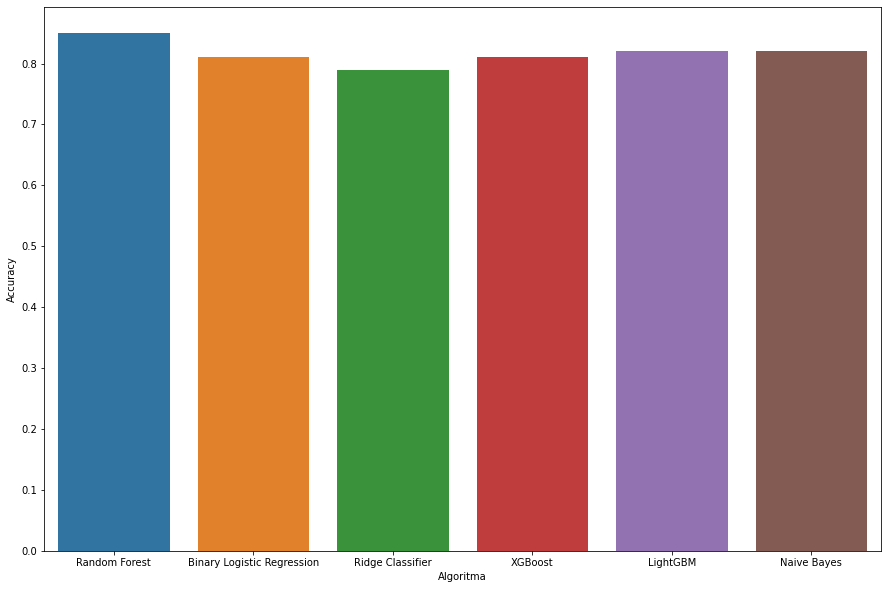

In [217]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15,10))
sns.barplot( x = "Algoritma", y = graph.Accuracy, data = graph);